In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
data = pd.read_excel('/content/drive/MyDrive/input_data.xlsx',sheet_name='Sheet1',
index_col=False,
keep_default_na=True
)

data.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
data.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [ ]:
data.dropna(inplace=True,axis=0)
data.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data.rename(columns={"Assignment group": "Assignment_group"},inplace=True)
data.rename(columns={"Short description": "Shr_des"},inplace=True)
data.head()
np.unique(data.Assignment_group), len(np.unique(data.Assignment_group)) 

(array(['GRP_0', 'GRP_1', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
        'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
        'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
        'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_3', 'GRP_30',
        'GRP_31', 'GRP_32', 'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36',
        'GRP_37', 'GRP_38', 'GRP_39', 'GRP_4', 'GRP_40', 'GRP_41',
        'GRP_42', 'GRP_43', 'GRP_44', 'GRP_45', 'GRP_46', 'GRP_47',
        'GRP_48', 'GRP_49', 'GRP_5', 'GRP_50', 'GRP_51', 'GRP_52',
        'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56', 'GRP_57', 'GRP_58',
        'GRP_59', 'GRP_6', 'GRP_60', 'GRP_61', 'GRP_62', 'GRP_63',
        'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67', 'GRP_68', 'GRP_69',
        'GRP_7', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73', 'GRP_8', 'GRP_9'],
       dtype=object), 74)

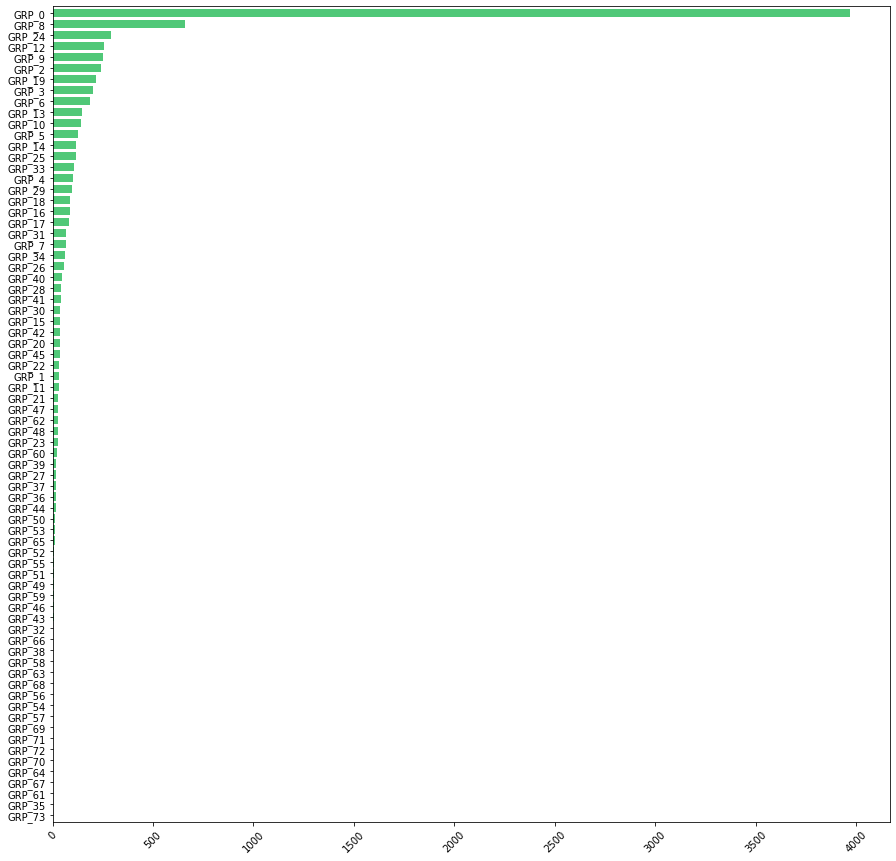

In [ ]:
data.Assignment_group.value_counts().sort_values(ascending = True).plot(kind='barh', width=0.75, figsize=(15, 15), color='#50C878')
plt.xticks(rotation=45)
plt.show()

In [ ]:
pd.set_option('max_rows',None)
Ticket_counts=data['Assignment_group'].value_counts()
Ticket_counts

GRP_0     3968
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
GRP_31      69
GRP_7       68
GRP_34      61
GRP_26      56
GRP_40      45
GRP_28      44
GRP_41      40
GRP_30      39
GRP_15      39
GRP_42      37
GRP_20      36
GRP_45      35
GRP_1       31
GRP_22      31
GRP_11      30
GRP_21      29
GRP_47      27
GRP_62      25
GRP_48      25
GRP_23      25
GRP_60      20
GRP_39      19
GRP_27      18
GRP_37      16
GRP_44      15
GRP_36      15
GRP_50      14
GRP_53      11
GRP_65      11
GRP_52       9
GRP_55       8
GRP_51       8
GRP_46       6
GRP_49       6
GRP_59       6
GRP_43       5
GRP_32       4
GRP_66       4
GRP_38       3
GRP_58       3
GRP_63       3
GRP_68       3
GRP_56       3
GRP_54       2
GRP_57       2
GRP_69       2
GRP_71    

In [ ]:
Ticket_counts.describe()

count      74.000000
mean      114.743243
std       464.840614
min         1.000000
25%         5.250000
50%        26.000000
75%        84.000000
max      3968.000000
Name: Assignment_group, dtype: float64

In [ ]:
def get_cat(GRP):
    
    # check if U.S. territory or out of country
    if GRP in ['GRP_8','GRP_24','GRP_12','GRP_9','GRP_2','GRP_19','GRP_3','GRP_6','GRP_13','GRP_10','GRP_5','GRP_14','GRP_25','GRP_33','GRP_4','GRP_29','GRP_18','GRP_16']:
        return 'L2'
    
    # the rest of the categories are based on U.S. Census Bureau regions
    elif GRP in ['GRP_17','GRP_31', 'GRP_7','GRP_34','GRP_26','GRP_40','GRP_28','GRP_41','GRP_30','GRP_15','GRP_42','GRP_20','GRP_45','GRP_1','GRP_22','GRP_11','GRP_21','GRP_47',
                 'GRP_62','GRP_48','GRP_23','GRP_60','GRP_39','GRP_27','GRP_37','GRP_36','GRP_44','GRP_50','GRP_65','GRP_53','GRP_52','GRP_55','GRP_51','GRP_49','GRP_59','GRP_46',
                 'GRP_43','GRP_32','GRP_66','GRP_68','GRP_38','GRP_63','GRP_56','GRP_58','GRP_72','GRP_57','GRP_71','GRP_69','GRP_54','GRP_70','GRP_64','GRP_73','GRP_67','GRP_61',
                 'GRP_35']:
        return 'L3'
    else:
        return 'L1'

In [ ]:
data['New_Grp'] = data['Assignment_group'].apply(get_cat)

In [ ]:
data['New_Grp'].value_counts(normalize=True) * 100

L1    46.731834
L2    40.325050
L3    12.943116
Name: New_Grp, dtype: float64

In [ ]:
import scipy.stats as stats

In [ ]:
data_crosstab = pd.crosstab(data['Caller'],
                            data['New_Grp'],
                           margins=True, margins_name="Total")

In [ ]:
# significance level
alpha = 0.05

# Calcualtion of Chisquare test statistics
chi_square = 0
rows = data['Caller'].unique()
columns = data['New_Grp'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 10436.524311831809  and p value is: 0.0
Null Hypothesis is rejected.


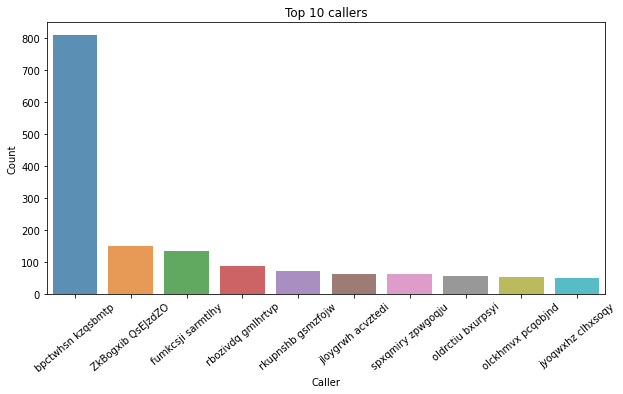

In [ ]:
ticket_count  = data['Caller'].value_counts()
ticket = ticket_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(ticket.index, ticket.values, alpha=0.8)
plt.xticks(rotation =40);
plt.xlabel('Caller')
plt.ylabel('Count')
plt.title('Top 10 callers')
plt.show()

In [ ]:
count_freq = dict(data['Caller'].value_counts())

In [ ]:
data['count_freq'] = data['Caller']
data['count_freq'] = data['count_freq'].map(count_freq)

In [ ]:
data['Caller_type'] = np.where(data['count_freq']>1, 'Rep', 'No')

In [ ]:
data['Caller_type'].value_counts(normalize=True) * 100

Rep    82.8171
No     17.1829
Name: Caller_type, dtype: float64

In [ ]:
data_crosstab = pd.crosstab(data['Caller_type'],
                            data['New_Grp'],
                           margins=True, margins_name="Total")

In [ ]:
# significance level
alpha = 0.05

# Calcualtion of Chisquare test statistics
chi_square = 0
rows = data['Caller_type'].unique()
columns = data['New_Grp'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 165.5590528645767  and p value is: 0.0
Null Hypothesis is rejected.


In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [ ]:
grp_0 = data[data["New_Grp"] == 'L1']
grp_0.head()

,Shr_des,Description,Caller,Assignment_group,New_Grp,count_freq,Caller_type
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,L1,1,No
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,L1,4,Rep
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,L1,4,Rep
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,L1,3,Rep
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,L1,5,Rep


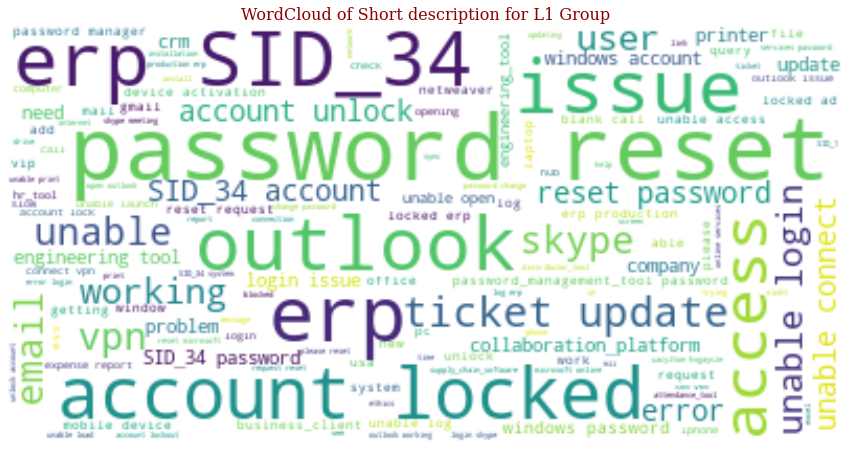

In [ ]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
All_words = ""
All_words += " ".join(grp_0['Shr_des'])
wordcloud = WordCloud(background_color='white').generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Short description for L1 Group", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
grp_L2 = data[data["New_Grp"] == 'L2']
grp_L2.head()

,Shr_des,Description,Caller,Assignment_group,New_Grp,count_freq,Caller_type
17,"when undocking pc , screen will not come back","when undocking pc , screen will not come back",sigfdwcj reofwzlm,GRP_3,L2,2,Rep
32,duplication of network address.,\n\nreceived from: kxsceyzo.naokumlb@gmail.com...,kxsceyzo naokumlb,GRP_4,L2,6,Rep
43,please reroute jobs on printer01 to printer02 ...,\n\nreceived from: yisohglr.uvteflgb@gmail.com...,yisohglr uvteflgb,GRP_5,L2,2,Rep
47,job Job_1424 failed in job_scheduler at: 10/31...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_6,L2,810,Rep
50,job mm_zscr0099_dly_merktc3 failed in job_sche...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8,L2,810,Rep


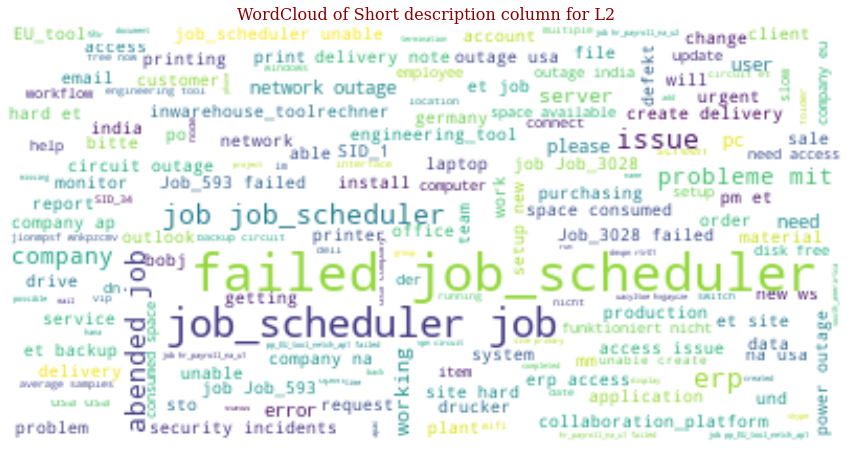

In [ ]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
All_words = ""
All_words += " ".join(grp_L2['Shr_des'])
wordcloud = WordCloud(background_color='white').generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Short description column for L2", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
grp_L3 = data[data["New_Grp"] == 'L3']
grp_L3.head()

,Shr_des,Description,Caller,Assignment_group,New_Grp,count_freq,Caller_type
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1,L3,51,Rep
49,status does not change on telephony_software,"when closing a call, the agent keeps on the ""o...",aofnvyzt eqiyskhm,GRP_7,L3,3,Rep
84,engineering tool drawing originals in pdf form...,"hello it service,\r\ni need to monitor the man...",vlymsnej whlqxcst,GRP_11,L3,2,Rep
141,channel partner receiving multiple emails from...,"hi,\nour channel partner with the email addres...",qcfmxgid jvxanwre,GRP_15,L3,12,Rep
155,reset passwords for hckvpary emxbpkwy using pa...,"employee is getting an error ""user authenticat...",hckvpary emxbpkwy,GRP_17,L3,1,No


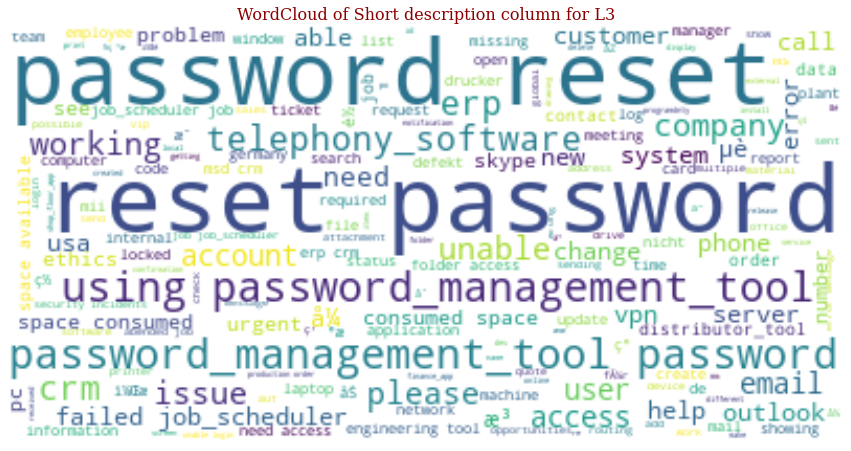

In [ ]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
All_words = ""
All_words += " ".join(grp_L3['Shr_des'])
wordcloud = WordCloud(background_color='white').generate(All_words) # width and height in the wordcloud attribute does not work
plt.figure(figsize=(15,15))
plt.title("WordCloud of Short description column for L3", fontdict=font)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
import re

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #word stemmer class
lemma = WordNetLemmatizer()

In [ ]:
def normalizer(text):
    text = " ".join(filter(lambda x: x[0]!= '@' , text.split()))
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = re.sub(' +', ' ', text).strip()
    text = text.split()
    text = [words for words in text if not words in set(stopwords.words('english'))]
    text = [lemma.lemmatize(word) for word in text]
    
    text = " ".join(text)
    return text

In [ ]:
data['shrt_data'] = data['Shr_des'].apply(normalizer)

In [ ]:
data1= data.drop(columns = ['Shr_des','Description','Caller','Assignment_group','count_freq'], axis = 1)
data1.head()

,New_Grp,Caller_type,shrt_data
0,L1,No,login issue
1,L1,Rep,outlook
2,L1,Rep,cant log vpn
3,L1,Rep,unable access hr tool page
4,L1,Rep,skype error


In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data1["Label_grp"] = le.fit_transform(data1["New_Grp"])
y_classes_len = len(le.classes_)
le.classes_
print(y_classes_len)

3


In [ ]:
data1['Caller_type']=np.where(data1['Caller_type']=='Rep', 1, 0)

In [ ]:
data1.head()

,New_Grp,Caller_type,shrt_data,Label_grp
0,L1,0,login issue,0
1,L1,1,outlook,0
2,L1,1,cant log vpn,0
3,L1,1,unable access hr tool page,0
4,L1,1,skype error,0


In [ ]:
data1= data1.drop(columns = ['New_Grp'], axis = 1)
data1.head()

,Caller_type,shrt_data,Label_grp
0,0,login issue,0
1,1,outlook,0
2,1,cant log vpn,0
3,1,unable access hr tool page,0
4,1,skype error,0


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def mytokenizer(x):
    return [y for y in x.split() if len(y) > 2]

In [ ]:
vec = CountVectorizer(tokenizer=mytokenizer, min_df=0.005)
X = vec.fit_transform(data1['shrt_data'])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())


In [ ]:
s1 = pd.Series(data1['Label_grp'], name="Label_grp")
s2= pd.Series(data1['Caller_type'], name="Caller_type")

In [ ]:
df1=df.reset_index(drop=True)
s3=s1.reset_index(drop=True)
s4=s2.reset_index(drop=True)

In [ ]:
result = pd.concat([df1, s3,s4], axis=1)

In [ ]:
result.head(5)

,abended,able,access,account,activation,add,app,application,audio,available,blank,business,call,cannot,change,check,circuit,client,collaboration,com,company,computer,connect,connection,consumed,create,crm,customer,data,defekt,delivery,device,drive,email,employee,engineering,erp,error,ethic,expense,...,report,request,reset,sale,scheduler,screen,security,see,server,service,setup,sid,since,site,skype,slow,software,space,system,team,telephony,ticket,time,tool,uacyltoe,unable,unlock,update,urgent,usa,user,using,vip,vpn,wifi,window,work,working,Label_grp,Caller_type
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#creating a copy of the train data and seperating the target column and the predictor variables

X=result.drop(['Label_grp'],axis=1)
y=result['Label_grp']

In [ ]:
#loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import binarize
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score,KFold
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn import metrics
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# splitting data training dataset into train and test set for independent attributes
X_train, X_test, Y_train, Y_test =train_test_split(X,y, test_size=.30,random_state=105)

In [ ]:
# Initializaing various classification algorithms with normal dataset and choosing the best model based on f1 score for tuning

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear',probability=True)))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))
models.append(("LightGBM",LGBMClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=55,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold,scoring='roc_auc_ovo')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

LR: 82.599470% (1.459450%)
KNN: 78.272079% (1.387364%)
GNB: 77.405603% (1.682381%)
SVM: 77.363358% (1.541897%)
DT: 76.250588% (2.211897%)
RF: 83.277266% (1.696373%)
GBT: 83.095521% (1.188273%)
XGB: 82.571253% (1.214113%)
LightGBM: 83.734948% (1.620008%)


In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [ ]:
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
             'scale_pos_weight':[1,2,6,12]}

sample = 100

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 2000 define only the absolute maximum
lgb = LGBMClassifier(max_depth=-1, random_state=31, silent=True, metric='multi_logloss', n_jobs=4, n_estimators=2000)
gs = RandomizedSearchCV(
    estimator=lgb, param_distributions=param_test, 
    n_iter=sample,
    cv=5,
    refit=True,
    random_state=314,
    verbose=True)

gs.fit(X_train, Y_train)
gs.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 22.3min finished


{'colsample_bytree': 0.7971800681927883,
 'min_child_samples': 105,
 'min_child_weight': 1e-05,
 'num_leaves': 26,
 'reg_alpha': 5,
 'reg_lambda': 5,
 'scale_pos_weight': 6,
 'subsample': 0.2487612991005925}

In [ ]:
lgb=LGBMClassifier(colsample_bytree= 0.7971800681927883,
 min_child_samples= 105,
 min_child_weight= 1e-05,
 num_leaves=26,
 reg_alpha= 5,
 reg_lambda= 5,
 scale_pos_weight= 6,
 subsample= 0.2487612991005925)
lgb.fit(X_train,Y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.7971800681927883, importance_type='split',
               learning_rate=0.1, max_depth=-1, min_child_samples=105,
               min_child_weight=1e-05, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=26, objective=None, random_state=None,
               reg_alpha=5, reg_lambda=5, scale_pos_weight=6, silent=True,
               subsample=0.2487612991005925, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
modellgb1=lgb.score(X_train,Y_train)
print('Accuracy Score of Training Data: ', modellgb1)

Accuracy Score of Training Data:  0.6782769644960458


In [ ]:
y_predictlg1= lgb.predict(X_test)
modellg1 = accuracy_score(Y_test, y_predictlg1)
print('Accuracy Score of Test Data:', modellg1)

Accuracy Score of Test Data: 0.6844583987441131


In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictlg1, labels=[0,1,2]))

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.69      0.74      1233
           1       0.61      0.86      0.71       996
           2       0.57      0.11      0.19       319

    accuracy                           0.68      2548
   macro avg       0.66      0.55      0.55      2548
weighted avg       0.69      0.68      0.66      2548



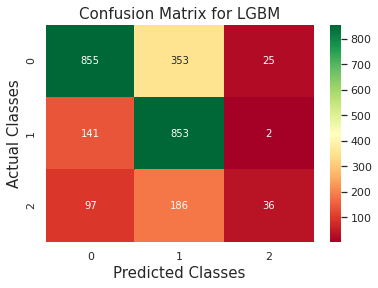

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_predictlg1)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for LGBM', fontsize = 15);

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = range(2,100,5)
# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,100,10)
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'criterion':['gini','entropy']}

In [ ]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 5, verbose=2, random_state=90, n_jobs = -1)
rf_random.fit(X_train, Y_train)
rf_random.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   48.7s finished


{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 82,
 'n_estimators': 463}

In [ ]:
rf_grid1 = RandomForestClassifier(n_estimators=463,
 min_samples_split= 82,
 min_samples_leaf=1,
 max_features= 'sqrt',
 max_depth= 110,
 criterion= 'gini',
 bootstrap= False)
rf_grid1.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=110, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=82,
                       min_weight_fraction_leaf=0.0, n_estimators=463,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
modelrfg1_score=rf_grid1.score(X_train,Y_train)
print('Accuracy Score of Training Data: ', modelrfg1_score)

Accuracy Score of Training Data:  0.7918559650008413


In [ ]:
y_predictrfg1= rf_grid1.predict(X_test)
modelrfg1_score = accuracy_score(Y_test, y_predictrfg1)
print('Accuracy Score of Test Data:', modelrfg1_score)

Accuracy Score of Test Data: 0.7425431711145997


In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictrfg1, labels=[0,1,2]))

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1233
           1       0.73      0.79      0.76       996
           2       0.53      0.24      0.33       319

    accuracy                           0.74      2548
   macro avg       0.68      0.62      0.63      2548
weighted avg       0.73      0.74      0.73      2548



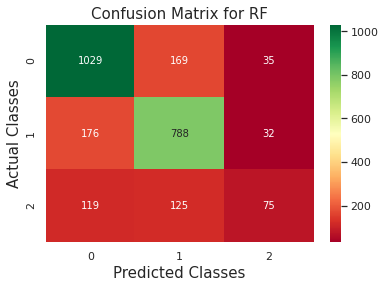

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_predictrfg1)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for RF', fontsize = 15);

In [ ]:
xgb_para = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
            "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
            "min_child_weight" : [ 1, 3, 5, 7 ],
            "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
            "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
           }

xgb = XGBClassifier()
xgb_hy = RandomizedSearchCV(estimator = xgb, param_distributions = xgb_para, cv = 5, verbose=2, random_state=25, n_jobs = -1)
xgb_hy.fit(X_train, Y_train)
xgb_hy.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.3min finished


{'colsample_bytree': 0.7,
 'gamma': 0.2,
 'learning_rate': 0.2,
 'max_depth': 15,
 'min_child_weight': 3}

In [ ]:
xgb=XGBClassifier(min_child_weight=3,
 max_depth=15,
 learning_rate= 0.2,
 gamma= 0.2,
 colsample_bytree=0.7)
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
modelxgb_score=xgb.score(X_train,Y_train)
print('Accuracy Score of Training Data: ', modelxgb_score)

Accuracy Score of Training Data:  0.7777216893824668


In [ ]:
y_predictxg= xgb.predict(X_test)
modelxg_score = accuracy_score(Y_test, y_predictxg)
print('Accuracy Score of Test Data:', modelxg_score)

Accuracy Score of Test Data: 0.749607535321821


In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictxg, labels=[0,1,2]))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1233
           1       0.71      0.83      0.76       996
           2       0.59      0.24      0.35       319

    accuracy                           0.75      2548
   macro avg       0.70      0.63      0.64      2548
weighted avg       0.74      0.75      0.73      2548



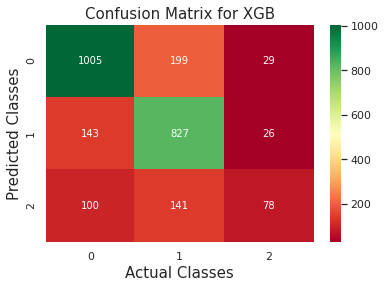

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_predictxg)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for XGB', fontsize = 15);

In [ ]:
def get_cat1(GRP):
    
    # check if U.S. territory or out of country
    if GRP in ['L2']:
        return 'L2'
    
    else:
        return 'L1'

In [ ]:
dd=data.copy()

In [ ]:
dd['New_Grp'] = dd['New_Grp'].apply(get_cat1)

In [ ]:
dd['New_Grp'].value_counts(normalize=True) * 100

L1    59.67495
L2    40.32505
Name: New_Grp, dtype: float64

In [ ]:
dd.head()

,Shr_des,Description,Caller,Assignment_group,New_Grp,count_freq,Caller_type,shrt_data
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,L1,1,No,login issue
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,L1,4,Rep,outlook
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,L1,4,Rep,cant log vpn
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,L1,3,Rep,unable access hr tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,L1,5,Rep,skype error


In [ ]:
dd1= dd.drop(columns = ['Shr_des','Description','Caller','Assignment_group','count_freq'], axis = 1)
dd1.head()

,New_Grp,Caller_type,shrt_data
0,L1,No,login issue
1,L1,Rep,outlook
2,L1,Rep,cant log vpn
3,L1,Rep,unable access hr tool page
4,L1,Rep,skype error


In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
dd1["Label_grp"] = le.fit_transform(dd1["New_Grp"])
y_classes_len = len(le.classes_)
le.classes_
print(y_classes_len)

2


In [ ]:
dd1['Caller_type']=np.where(dd1['Caller_type']=='Rep', 1, 0)

In [ ]:
dd1.head()

,New_Grp,Caller_type,shrt_data,Label_grp
0,L1,0,login issue,0
1,L1,1,outlook,0
2,L1,1,cant log vpn,0
3,L1,1,unable access hr tool page,0
4,L1,1,skype error,0


In [ ]:
dd1= dd1.drop(columns = ['New_Grp'], axis = 1)
dd1.head()

,Caller_type,shrt_data,Label_grp
0,0,login issue,0
1,1,outlook,0
2,1,cant log vpn,0
3,1,unable access hr tool page,0
4,1,skype error,0


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vec = CountVectorizer(tokenizer=mytokenizer, min_df=0.005)
X = vec.fit_transform(dd1['shrt_data'])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())


In [ ]:
s1 = pd.Series(dd1['Label_grp'], name="Label_grp")
s2= pd.Series(dd1['Caller_type'], name="Caller_type")

In [ ]:
df1=df.reset_index(drop=True)
s3=s1.reset_index(drop=True)
s4=s2.reset_index(drop=True)

In [ ]:
result = pd.concat([df1, s3,s4], axis=1)

In [ ]:
result.head()

,abended,able,access,account,activation,add,app,application,audio,available,blank,business,call,cannot,change,check,circuit,client,collaboration,com,company,computer,connect,connection,consumed,create,crm,customer,data,defekt,delivery,device,drive,email,employee,engineering,erp,error,ethic,expense,...,report,request,reset,sale,scheduler,screen,security,see,server,service,setup,sid,since,site,skype,slow,software,space,system,team,telephony,ticket,time,tool,uacyltoe,unable,unlock,update,urgent,usa,user,using,vip,vpn,wifi,window,work,working,Label_grp,Caller_type
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#creating a copy of the train data and seperating the target column and the predictor variables

X=result.drop(['Label_grp'],axis=1)
y=result['Label_grp']

In [ ]:
# splitting data training dataset into train and test set for independent attributes
X_train, X_test, Y_train, Y_test =train_test_split(X,y, test_size=.30,random_state=12)

In [ ]:
# Initializaing various classification algorithms with normal dataset and choosing the best model based on f1 score for tuning

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear',probability=True)))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier(verbosity=0)))
models.append(("LightGBM",LGBMClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=55,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold,scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f%% (%f%%)' % (name, cv_results.mean()*100, cv_results.std()*100)
    print(msg)

LR: 88.007322% (1.392384%)
KNN: 85.106538% (1.816371%)
GNB: 85.277101% (1.169259%)
SVM: 86.650968% (1.523097%)
DT: 81.421604% (2.554817%)
RF: 87.366355% (1.830686%)
GBT: 87.839895% (1.399456%)
XGB: 87.091480% (1.740410%)
LightGBM: 88.592023% (1.377156%)


In [ ]:
result['Label_grp'].value_counts(normalize=True) * 100

0    46.731834
1    40.325050
2    12.943116
Name: Label_grp, dtype: float64

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = range(2,100,5)
# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,100,10)
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'criterion':['gini','entropy']}

In [ ]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 5, verbose=2, random_state=90, n_jobs = -1)
rf_random.fit(X_train, Y_train)
rf_random.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   48.5s finished


{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 82,
 'n_estimators': 463}

In [ ]:
rf_grid1 = RandomForestClassifier(n_estimators=463,
 min_samples_split= 82,
 min_samples_leaf=1,
 max_features= 'sqrt',
 max_depth= 110,
 criterion= 'gini',
 bootstrap= False)
rf_grid1.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=110, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=82,
                       min_weight_fraction_leaf=0.0, n_estimators=463,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
modelrfg1_score=rf_grid1.score(X_train,Y_train)
print('Accuracy Score of Training Data: ', modelrfg1_score)

Accuracy Score of Training Data:  0.8472152111728083


In [ ]:
y_predictrfg1= rf_grid1.predict(X_test)
modelrfg1_score = accuracy_score(Y_test, y_predictrfg1)
print('Accuracy Score of Test Data:', modelrfg1_score)

Accuracy Score of Test Data: 0.8065149136577708


In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictrfg1, labels=[0,1]))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1545
           1       0.81      0.67      0.73      1003

    accuracy                           0.81      2548
   macro avg       0.81      0.78      0.79      2548
weighted avg       0.81      0.81      0.80      2548



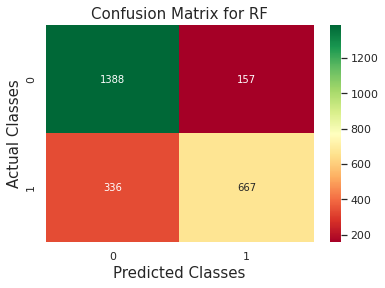

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_predictrfg1)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for RF', fontsize = 15);

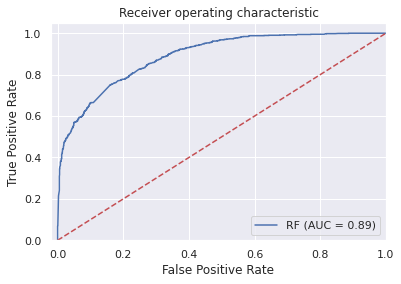

In [ ]:
#Plotting ROC and AUC
probs = rf_grid1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc_rfo = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF (AUC = %0.2f)' % roc_auc_rfo)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})
print(roc.loc[(roc.tf-0).abs().argsort()[:1]])

          fpr      tpr     1-fpr       tf  threshold
285  0.214239  0.78664  0.785761  0.00088   0.429096


In [ ]:
# store the predicted probabilities  for failed class 
y_pred_prob = rf_grid1.predict_proba(X_test)[:, 1]
# predict fail if the predicted probability is greater than 0.43
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.43)[0]

In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_pred_class, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.71      0.79      0.74      1003
           0       0.85      0.79      0.82      1545

    accuracy                           0.79      2548
   macro avg       0.78      0.79      0.78      2548
weighted avg       0.79      0.79      0.79      2548



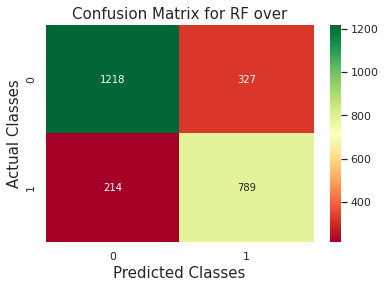

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_pred_class)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for RF over', fontsize = 15);

In [ ]:
xgb=XGBClassifier(min_child_weight=3,
 max_depth=15,
 learning_rate= 0.2,
 gamma= 0.2,
 colsample_bytree=0.7)
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
modelxgb_score=xgb.score(X_train,Y_train)
print('Accuracy Score of Training Data: ', modelxgb_score)

Accuracy Score of Training Data:  0.8239946155140502


In [ ]:
y_predictxg= xgb.predict(X_test)
modelxg_score = accuracy_score(Y_test, y_predictxg)
print('Accuracy Score of Test Data:', modelxg_score)

Accuracy Score of Test Data: 0.7990580847723705


In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_predictxg, labels=[0,1]))

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.90      0.84      1545
           1       0.81      0.64      0.72      1003

    accuracy                           0.80      2548
   macro avg       0.80      0.77      0.78      2548
weighted avg       0.80      0.80      0.79      2548



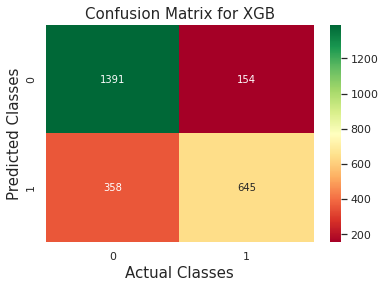

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_predictxg)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for XGB', fontsize = 15);

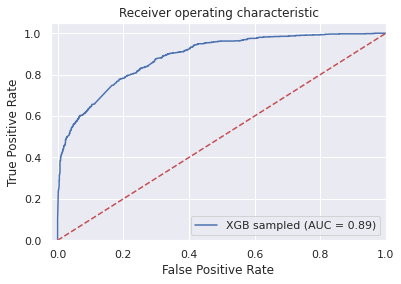

In [ ]:
#Plotting ROC and AUC
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc_xg = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='XGB sampled (AUC = %0.2f)' % roc_auc_xg)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})
print(roc.loc[(roc.tf-0).abs().argsort()[:1]])

          fpr      tpr     1-fpr       tf  threshold
285  0.214239  0.78664  0.785761  0.00088   0.429096


In [ ]:
# store the predicted probabilities for failed class 
y_pred_prob = xgb.predict_proba(X_test)[:, 1]
# predict fail if the predicted probability is greater than 0.43
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.43)[0]

In [ ]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(Y_test, y_pred_class, labels=[0,1]))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.78      0.81      1545
           1       0.70      0.80      0.75      1003

    accuracy                           0.79      2548
   macro avg       0.78      0.79      0.78      2548
weighted avg       0.80      0.79      0.79      2548



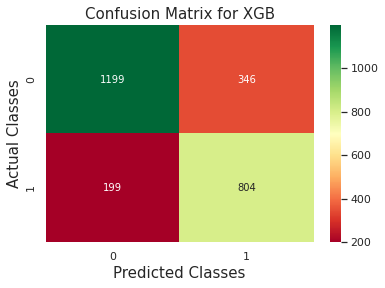

In [ ]:
# visualizing confusion matrix
cm= confusion_matrix(Y_test, y_pred_class)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.ylabel('Actual Classes', fontsize = 15)
plt.xlabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for XGB', fontsize = 15);